# Environment setting

In [1]:
!git clone https://github.com/juhannam/gct634-2020.git

Cloning into 'gct634-2020'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 228 (delta 114), reused 162 (delta 62), pack-reused 0
Receiving objects: 100% (228/228), 16.74 MiB | 19.01 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [2]:
%cd gct634-2020/hw3

/content/gct634-2020/hw3


In [3]:
!gdown --id 1wvN_ZWDiss1YCpC7GAPBMMlyrFYOB6NZ

Downloading...
From: https://drive.google.com/uc?id=1wvN_ZWDiss1YCpC7GAPBMMlyrFYOB6NZ
To: /content/gct634-2020/hw3/maestro_small.zip
1.14GB [00:10, 105MB/s] 


In [4]:
!unzip -q maestro_small.zip

In [5]:
!ls data

2004  2006  2008  2009	2011  2013  2014  2015	2017  2018  data.json


In [6]:
import torch as th
print(th.__version__)

1.7.0+cu101


If torch version == 1.6.x, install torchaudio==0.6

In [7]:
!apt-get install fluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 12 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libqt5x11extras5 amd64 5.9.5-0ubuntu1 [8,596 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic/uni

In [8]:
!pip install torchaudio tqdm soundfile mir_eval pretty_midi pyFluidSynth 

     |████████████████████████████████| 7.6MB 4.4MB/s 
     |████████████████████████████████| 92kB 12.8MB/s 
     |████████████████████████████████| 5.6MB 17.0MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
  Created wheel for mir-eval: filename=mir_eval-0.6-cp36-none-any.whl size=96516 sha256=3fe4e8d890ce979e7dffec79dc02f302721bc5736cfa7707c5fd20631144edc6
  Stored in directory: /root/.cache/pip/wheels/49/ce/30/730fa72addf275e49d90683b01b3613048b4be3bf7ff8eb6ec
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-cp36-none-any.whl size=5591954 sha256=60702298da947d452a37705fb668aebbdf7ef192b1c3ac3b488b66961cbf7417
  Stored in directory: /root/.cache/pip/wheels/4c/a1/c6/b5697841db1112c6e5866d75a6b6bf1bef73b874782556ba66
Successfully built mir-eval pretty-midi


# Checkout dataset(same as notebooks.dataset.ipynb)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

from dataset import MAESTRO_small
from constants import HOP_SIZE

In [10]:
example_dataset = MAESTRO_small(path='data', groups=['debug'], sequence_length=None, random_sample=True)

Loading group debug:   0%|          | 0/10 [00:00<?, ?it/s]

Loading 1 group of MAESTRO_small at data


Loading group debug: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]


In [11]:
data = example_dataset[1]
print(f'data: {data}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

print(f'HOP_SIZE({HOP_SIZE}) x piano_roll length({data["frame"].shape[0]}): {HOP_SIZE*data["frame"].shape[0]}')

data: {'path': 'data/2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID--AUDIO_12_R1_2004_08_Track08_wav.flac', 'audio': tensor([-0.0002, -0.0002, -0.0001,  ...,  0.0149,  0.0022, -0.0390]), 'frame': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'onset': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}
audio_shape: torch.Size([5411840])
frame_roll_shape: torch.Size([10570, 88])
onset_roll_shape: torch.Size([10570, 88])
HOP_SIZE(512) x piano_roll length(10570): 5411840


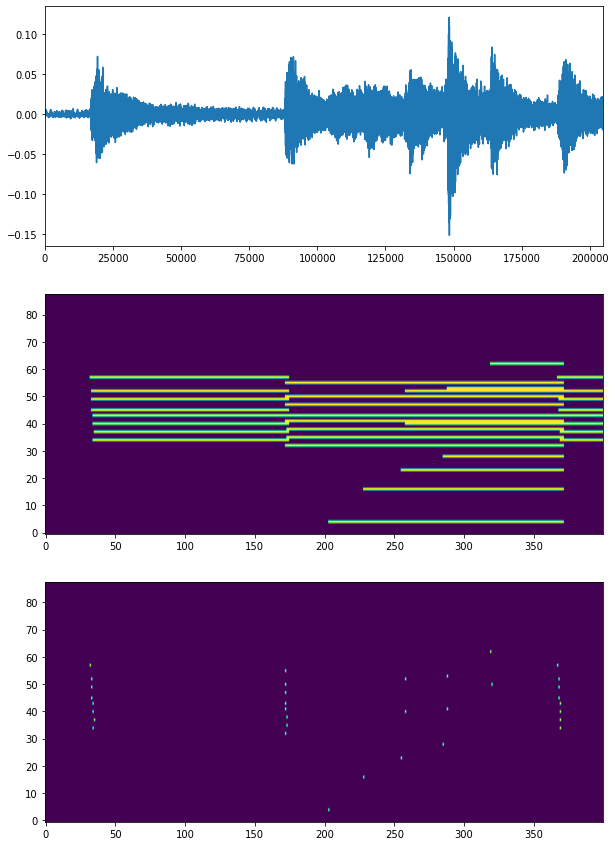

In [12]:
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.plot(data['audio'].numpy()[:400*HOP_SIZE])
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(312)
plt.imshow(data['frame'].numpy()[:400].T, aspect='auto', origin='bottom')
plt.subplot(313)
plt.imshow(data['onset'].numpy()[:400].T, aspect='auto', origin='bottom')

# Train 1k (Baseline)

In [14]:
! python train.py -i=1000 -vi=500 --save_midi

/usr/local/lib/python3.6/dist-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '
Loading 1 group of MAESTRO_small at data
Loading group train: 100% 100/100 [00:40<00:00,  2.44it/s]
Loading 1 group of MAESTRO_small at data
Loading group validation: 100% 20/20 [00:08<00:00,  2.47it/s]
  0% 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided

You will have your model checkpoints & decoded samples in runs/exp_{datetime} folder